In [1]:
import warnings
warnings.filterwarnings('ignore')
#忽略warnings（在导入数据时，有时会出现warnings，但不要因为这件事就立即删除）

In [2]:
import pandas as pd
#导入数据分析包【pandas】，并简称为pd

In [3]:
pip install panda


The following command must be run outside of the IPython shell:

    $ pip install panda

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#导入test set和train set

In [5]:
train_df.shape,test_df.shape
#展示test set和train set，（行数，列数）
#为什么训练集会比测试集多一列，y值的那一列，需要用x回归得出y值

((891, 12), (418, 11))

In [9]:
import matplotlib.pyplot as plt
#导入图形绘制包

In [10]:
print(train_df.columns.values)
#读取训练集的表头

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [11]:
print(test_df.columns.values)
#读取测试集的表头

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [12]:
train_df.head()
#预览数据，前五行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df.head()
#由此可见，该数据集的划分是直接以编号划分的

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_df.info()
#训练集基本信息查询

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
test_df.info()
#测试集基本信息查询

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
train_df.isnull().sum()
#查看空值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test_df.isnull().sum()
#查看空值

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
train_df.describe()
#训练集的基本数据信息

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
test_df.describe()
#测试集的基本数据信息
#该情况下只会对数值数据进行处理，忽略分类数据

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
#以下是用图表来了解数据
#之前已经导入了数据包，并且重命名为plt

Text(0, 0.5, 'Count')

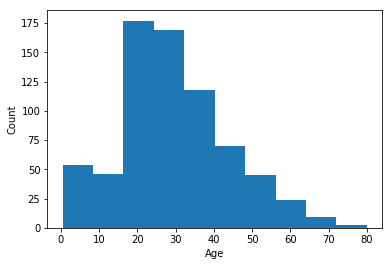

In [21]:
plt.hist(train_df['Age'])#绘制直方图
plt.xlabel('Age')#x轴为Age
plt.ylabel('Count')#y轴为数值
#不处理空值会报错

Text(0, 0.5, 'Count')

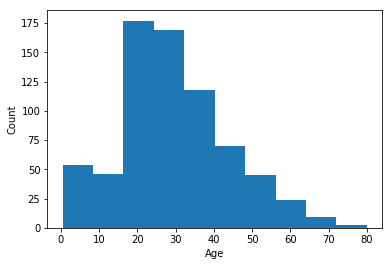

In [22]:
plt.hist(train_df['Age'].dropna())#绘制直方图,    「 .dropna() 」去空值
plt.xlabel('Age')#x轴为Age
plt.ylabel('Count')#y轴为数值

Text(0, 0.5, 'Count')

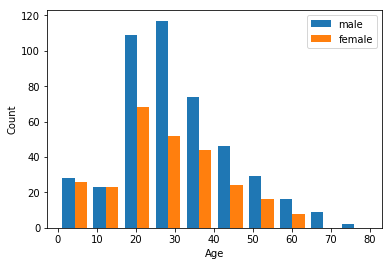

In [23]:
plt.hist([train_df[train_df['Sex'] == 'male'].Age,train_df[train_df['Sex'] == 'female'].Age])
#类比r语言，train_df[train_df['Sex'] == 'male'].Age-->指的是训练集中sex为男的情况下的人的年龄
plt.legend(['male','female']) #标上图例
plt.xlabel('Age')
plt.ylabel('Count')

In [24]:
pd.crosstab(train_df['Survived'],train_df['Sex'])
#交叉表crosstab生成，使用pandas包（存活人数和性别）

Sex,female,male
Survived,,
0,81,468
1,233,109


In [25]:
pd.crosstab(train_df['Survived'],train_df['Pclass'])
#存活人数和仓级的关系

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [26]:
train_df.groupby(['Embarked','Survived']).size()
#类比sql的groupby，size()-->count(*)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [27]:
#在python中使用sql语言

In [28]:
 pip install -U pandasql


The following command must be run outside of the IPython shell:

    $ pip install -U pandasql

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [31]:
from pandasql import sqldf
#对python中对pandas进行sql查询

In [32]:
ql ="""
select Survived,Parch,count(*)
from train_df
group by Survived,Parch
"""
sqldf(ql)


,Survived,Parch,count(*)
0,0,0,445
1,0,1,53
2,0,2,40
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,1
7,1,0,233
8,1,1,65
9,1,2,40


In [33]:
#python day2
#数据清理及数据可视化

In [34]:
import numpy as np
#numpy数据包-->开源的，可以用来储存和处理大型矩阵的数值计算扩展包

In [35]:
train_df.tail()
#浏览训练集末尾五行（默认值）
#此处必须先导入pandas数据包

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
train_df.isnull().sum()
#查询空值，r语言中空值查询代码是is.na 我还记得可真感动

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#处理空值
train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')
#fillna()-->用某某值取代空值
#均值取代  df['ColA'].fillna(value=df['ColA'].mean()
#向前，用前序数值补空值     df['ColA'].fillna(method='ffill'
#向后，用后续数值补空值     df['ColA'].fillna(method='ffill'
#https://medium.com/@zector1030/pandas-fillna-%E7%AF%84%E4%BE%8B-5d33819fb7b8
#上述网站是补空值的几种方法
s = train_df['Age'].value_counts(normalize = True)
#.value_counts()计数相当于sql中的count(*)，默认降序排列
#后接 normalize = True 为计数占比
#后接 ascending = True 升序排列

In [38]:
#s = train_df['Age'].interpolate(method='linear', inplace=True)
#插值，不知道是干嘛的

In [39]:
missing_age = train_df['Age'].isnull()
#判断年龄是否为空值
train_df.loc[missing_age,'Age'] = np.random.choice(s.index,size = len(train_df[missing_age]),p=s.values)
#给缺失的年龄值赋值，
#numpy.random随机赋值，赋值规则
#s.index  取值范围
#len()  平均值的长度为缺少的值的多少
#p = 概率大小，刚刚slist中算得占比

In [40]:
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)
#drop() 删去行，
#drop(  , axis = 1) 删除列

In [41]:
# 使用正则表达式将Title中的称呼提取出来，如Mr.
#http://www.runoob.com/python/python-reg-expressions.html
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.',expand = False)

In [42]:
train_df.Title.unique()
#unique(),相当于sql中的distinct，只出现一次

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [43]:
pd.crosstab(train_df['Title'], train_df['Survived'])
#交叉表生成，Title X Survived

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [44]:
train_df['Title'] = train_df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
#把出现频率较低的title换成rare
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [45]:
pd.crosstab(train_df['Title'], train_df['Survived'])
#新交叉表生成，Title X Survived

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,8


In [46]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#mean计算生还率

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [47]:
title_mapping = {"Mr": 1 , "Miss": 2 ,"Mrs": 3,"Mrs": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
#??? = {??:??} 定义词典
#??['??'] = ??['??'].map(???) 映射，相当于替换值
train_df['Title'] = train_df['Title'].fillna(0)
#补空值为0

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [49]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1 #找出或者的人
train_df['IsAlone'].loc[train_df['Family_size'] > 1] = 0 #活着的人里面有家人的就不alone了，所以定义为0
#family size 的创建
#判断是否单身IsAlone
#loc() 提取行数据，is alone的情况下 family size > 1的为0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

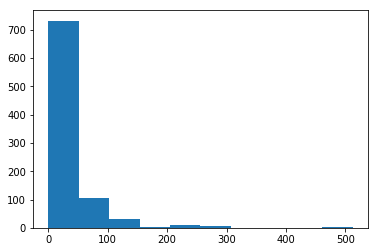

In [50]:
plt.hist(train_df['Fare'])
#票价直方图

In [51]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
#依据票价四等分

In [52]:
#利用cut把数据分成均等的五份
train_df['AgeBin'] = pd.cut(train_df['Age'], 5)
#预览可以看到区间

In [54]:
# 调用机器学习库scikit-learn中的LabelEncoder，标签标准化
#LabelEncoder是用来对分类型特征值进行编码，即对不连续的数值或文本进行编码。
from sklearn.preprocessing import LabelEncoder

In [55]:
# 创建一个名为label_encode的LabelEncoder对象
label_encode = LabelEncoder()
# 有下列label
labels = ['Sex','Embarked','AgeBin','FareBin']

In [56]:
#train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')

In [57]:
for label in labels:
    # 输出每一个label和它的数据类型
    print (label,type(label))
    # 新的标签名在原标签名的基础上加上_Code
    new_label = label + '_Code'
    # 调用LabelEncoder的fit_transform方法对原train_df[label]先拟合再标准化
    train_df[new_label] = label_encode.fit_transform(train_df[label])
    #fit(y) ：fit可看做一本空字典，y可看作要塞到字典中的词。 
    #fit_transform(y)：相当于先进行fit再进行transform，即把y塞到字典中去以后再进行transform得到索引值。

Sex <class 'str'>
Embarked <class 'str'>
AgeBin <class 'str'>
FareBin <class 'str'>


In [106]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0,2,0,"(-0.001, 7.91]","(16.336, 32.252]",1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4.0,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,0,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0,1,1,"(7.91, 14.454]","(16.336, 32.252]",0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4.0,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,2,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0,1,1,"(7.91, 14.454]","(32.252, 48.168]",1,2,2,1


In [59]:
original_feature = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['Title','Family_size','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

In [61]:
#载入seaborn包并以sns简化命名，当你使用数据科学中的Python时，你很有可能已经用了Matplotlib,一个供你创建高质量图像的2D库。
#另一个免费的可视化库就是Seaborn,他提供了一个绘制统计图形的高级接口。Seaborn是比Matplotlib更高级的免费库，特别地以数据可视化为目标，
#Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。
#用Matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。
import seaborn as sns

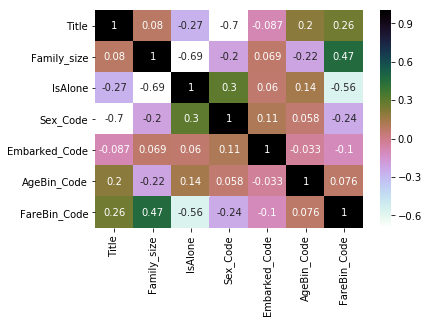

In [62]:
# 在上面，将众多属性名聚在一个list命名为new_feature
# 此处使用seaborn的heatmap方法，画出new_feature中各种特征两两之间的相似度热力图
sns.heatmap(train_df[new_feature].corr(),annot=True,cmap='cubehelix_r')

In [63]:
作业

NameError: name '作业' is not defined

In [64]:
#清洗测试集
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
test_df = test_df.drop(['Cabin'],axis = 1)
#Cabin 空值太多所以删除这一列

In [66]:
#数据缺失少的可以用ffill的方法
test_df['Fare'] = test_df['Fare'].fillna(method = 'ffill')

In [67]:
#age用概率的方法
s = test_df['Age'].value_counts(normalize = True)

In [68]:
missing_age = test_df['Age'].isnull()

In [69]:
test_df.loc[missing_age,'Age'] = np.random.choice(s.index,size=len(test_df[missing_age]),p=s.values) 

In [70]:
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.',expand = False)

In [71]:
test_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [72]:
#pd.crosstab(test_df['Title'],test_df['Survived'])

In [73]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [74]:
test_df['Title'] = test_df['Title'].replace(['Col','Don','Dr','Dona','Rev'],'Rare')
#把出现频率较低的title换成rare
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')

In [75]:
title_mapping = {"Mr": 1 , "Miss": 2 ,"Mrs": 3,"Master": 4, "Rare": 5}
test_df['Title'] = test_df['Title'].map(title_mapping)
#??? = {??:??} 定义词典
#??['??'] = ??['??'].map(???) 映射，相当于替换值
test_df['Title'] = test_df['Title'].fillna(0)

In [76]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [77]:
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = 1 #找出或者的人
test_df['IsAlone'].loc[test_df['Family_size'] > 1] = 0 #活着的人里面有家人的就不alone了，所以定义为0
#family size 的创建

In [78]:
test_df['FareBin'] = pd.qcut(test_df['Fare'], 4)

In [79]:
test_df['AgeBin'] = pd.cut(test_df['Age'], 5)

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
# 创建一个名为label_encode的LabelEncoder对象
label_encode = LabelEncoder()
# 有下列label
labels = ['Sex','Embarked','AgeBin','FareBin']

In [82]:
for label in labels:
    # 输出每一个label和它的数据类型
    print (label,type(label))
    # 新的标签名在原标签名的基础上加上_Code
    new_label = label + '_Code'
    # 调用LabelEncoder的fit_transform方法对原train_df[label]先拟合再标准化
    test_df[new_label] = label_encode.fit_transform(test_df[label])
    #fit(y) ：fit可看做一本空字典，y可看作要塞到字典中的词。 
    #fit_transform(y)：相当于先进行fit再进行transform，即把y塞到字典中去以后再进行transform得到索引值。

Sex <class 'str'>
Embarked <class 'str'>
AgeBin <class 'str'>
FareBin <class 'str'>


In [83]:
test_

NameError: name 'test_' is not defined

In [84]:
original_feature = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['Title','Family_size','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

In [85]:
import seaborn as sns

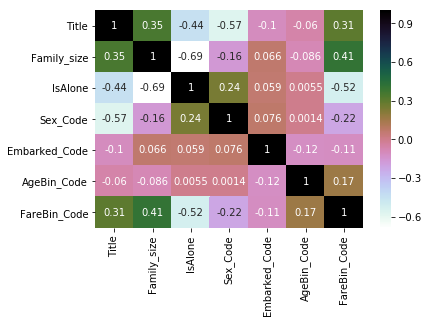

In [86]:
sns.heatmap(test_df[new_feature].corr(),annot=True,cmap='cubehelix_r')

In [ ]:
day3
数据清理
特征选择及数据划分（测试集和训练集）
理解选择模型

In [87]:
from sklearn.preprocessing import OneHotEncoder
#独热编码

In [88]:
enc = OneHotEncoder()
#创建对象，并命名为enc

In [89]:
oh_features=['Title','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
#创建list，并存放进行编码的属性

In [90]:
enc.fit(train_df[oh_features])
#进行独热编码


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [91]:
enc.categories_

[array([0., 1., 2., 4., 5.]),
 array([0., 1.]),
 array([0., 1., 2.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3.])]

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
#pip install -U numpy scipy scikit-learn

In [ ]:
#pip install --upgrade pip

In [92]:
enc_res = enc.transform(train_df[oh_features])

In [93]:
# 创建一个名为onehot_features的list,并存放要进行编码的属性
#onehot_features = ['Title','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
# 对这些属性进行独热编码并且求得train_df[onehot_features]的均值等属性
#enc.fit(train_df[onehot_features])

In [97]:
print(enc_res.toarray())
#查看enc_res的值

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [98]:
#查看数据的维度
print(enc_res.toarray().shape)

(891, 19)


In [ ]:
数据划分

In [103]:
original_features = ['PassengerId','Pclass', 'Name', 'Sex', 'Age' ,'SibSp', 'Parch','Ticket','Fare', 'Cabin', 'Embarked']
new_features = ['Title','Family_size','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
#创建了o_f和n_f两个list

In [104]:
final_features = ['Pclass','Age','SibSp','Parch','Fare','Title','Family_size',
                  'IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
# 删去难以运用的变量&重复的变量
onehot_final = list(set(final_features) - set(oh_features))
#特征值的加减法如上

In [105]:
oh_features

['Title', 'Sex_Code', 'Embarked_Code', 'AgeBin_Code', 'FareBin_Code']

In [107]:
all_x = train_df[final_features]
y = train_df['Survived']
#引入所有影响因素x值
#并且进行查看
all_x.head()

,Pclass,Age,SibSp,Parch,Fare,Title,Family_size,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,3,22.0,1,0,7.2500,1.0,2,0,1,2,1,0
1,1,38.0,1,0,71.2833,4.0,2,0,0,0,2,3
2,3,26.0,0,0,7.9250,2.0,1,1,0,2,1,1
3,1,35.0,1,0,53.1000,4.0,2,0,0,2,2,3
4,3,35.0,0,0,8.0500,1.0,1,1,1,2,2,1


In [108]:
# 将转换为数组的独热编码的值存放到onehot_added里
onehot_added = pd.DataFrame(enc_res.toarray())
# 使用pandas的concat函数将原数据中onehot_final这些列和onehot_added合并起来，concat函数专门用于连接两个或多个数组
# axis指定了合并的轴，此处axis=1意为逐列合并，若axis=0则为逐行合并；合并后的函数赋值为新的数据集all_x_2
all_x_2 = pd.concat([train_df[onehot_final],onehot_added],axis = 1)

In [110]:
all_x.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Title            0
Family_size      0
IsAlone          0
Sex_Code         0
Embarked_Code    0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [ ]:
终于划分测试集和训练集了

In [111]:
# 从scikit-learn中引入train_test_split
from sklearn.model_selection import train_test_split

In [112]:
# 对all_x进行数据集划分为训练集和测试集：xTrain为训练集数据，xTest为测试集数据
# y为数据集的标签（即该乘客是否存活），yTrain对应了训练集的标签，yTest对应了测试集的标签
# test_size=0.2表示测试集占总数据集的20%
xTrain, xTest, yTrain, yTest = train_test_split(all_x, y, test_size = 0.2, random_state = 0)

In [113]:
# 查看训练集和测试集的数据量
xTrain.shape, xTest.shape

((712, 12), (179, 12))

In [114]:
# 查看训练集标签数和测试集标签数
yTrain.shape,yTest.shape

((712,), (179,))

In [115]:
# 计算训练集中乘客存活率平均值和测试集中乘客存活率平均值
yTrain.mean(),yTest.mean()

(0.38342696629213485, 0.3854748603351955)

In [116]:
# 同样的对all_进行数据集划分
x2Train, x2Test, y2Train, y2Test = train_test_split(all_x_2, y, test_size = 0.2, random_state = 0)

In [120]:
from PIL import Image

In [121]:
# 如何选择适合的机器学习模型，这里的函数目的是给大家引入一个模型图的概括表！这个对于各位有志于从事机器学习和数据分析行业的同学来讲是个大大的福利
# 在这张表里你可以全面地看到非监督学习和监督学习两种模式下最常用的Model们，收藏好哦！
Image(filename='models.png') 

TypeError: 'module' object is not callable